# Olympic gamse data

In this exercise we'll explore the olympic games data 120 years back in time to see if we can find anything interesting. Many things that we can do in pandas can be done much faster and simpler by using duckdb, so lets use duckdb in this exercise.

We will not create a separate duckdb database in this exercise, instead we'll query a pandas dataframe directly and return a dataframe.

**a)** Start with reading in the dataset into a dataframe using pandas.

In [2]:
import pandas as pd
import duckdb as db

df = pd.read_csv("data/athlete_events.csv")

**b)**  Now here is the code for using duckdb on pandas and it will return a df

- query(SELECT * FROM df).df()

In [3]:
db.query("SELECT * FROM df").df()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


**c)** Use pandas columns method to find out the columns

In [4]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

**d)** Find out the 10 oldest atheletes, their age and the sport

In [5]:
olympic_10_oldest = db.query("SELECT Name,AGE FROM df ORDER BY AGE DESC LIMIT 10").df()
olympic_10_oldest

,Name,Age
0,John Quincy Adams Ward,97.0
1,Winslow Homer,96.0
2,Thomas Cowperthwait Eakins,88.0
3,Thomas Cowperthwait Eakins,88.0
4,Thomas Cowperthwait Eakins,88.0
5,George Denholm Armour,84.0
6,Louis Tauzin,81.0
7,Robert Tait McKenzie,81.0
8,Max Liebermann,80.0
9,Max Liebermann,80.0


**e)**  Find out the 10 youngest atheletes, their age and the sport

In [6]:
youngest_athelens = db.query("SELECT Name, Team, Age, Sport FROM df ORDER BY Age ASC LIMIT 10").df()
youngest_athelens

,Name,Team,Age,Sport
0,Dimitrios Loundras,Ethnikos Gymnastikos Syllogos,10.0,Gymnastics
1,Megan Olwen Devenish Taylor (-Mandeville-Ellis),Great Britain,11.0,Figure Skating
2,Liana Vicens,Puerto Rico,11.0,Swimming
3,Liana Vicens,Puerto Rico,11.0,Swimming
4,Liana Vicens,Puerto Rico,11.0,Swimming
5,Liana Vicens,Puerto Rico,11.0,Swimming
6,Etsuko Inada,Japan,11.0,Figure Skating
7,Liu Luyang,China,11.0,Figure Skating
8,Marcelle Matthews,South Africa,11.0,Figure Skating
9,Magdalena Cecilia Colledge,Great Britain,11.0,Figure Skating


**f)** Find out the five sports with highest median age

In [7]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [8]:
sport_highest_average_age = db.query("SELECT Sport, MEDIAN(Age) as mean_age FROM df GROUP BY Sport ORDER BY mean_age DESC LIMIT 5").df()
sport_highest_average_age

,Sport,mean_age
0,Roque,59.0
1,Art Competitions,45.0
2,Alpinism,38.0
3,Polo,35.0
4,Shooting,33.0


**g)** Find out the five sports with lowest median age

In [9]:
sport_lowest_average_age = db.query("SELECT Sport, MEAN(Age) as median_age FROM df GROUP BY Sport ORDER BY median_age ASC LIMIT 5").df()
sport_lowest_average_age

,Sport,median_age
0,Rhythmic Gymnastics,18.737082
1,Swimming,20.566803
2,Figure Skating,22.232190
3,Synchronized Swimming,22.366851
4,Diving,22.481441


**H)** Find out top 10 countries after number of gold medals

In [10]:
df.columns



Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [11]:
top_gold_medal = db.query("SELECT NOC, COUNT(Medal) as number_gold_medal FROM df WHERE Medal = 'Gold' GROUP BY NOC ORDER BY number_gold_medal DESC LIMIT 10").df()
top_gold_medal

,NOC,number_gold_medal
0,USA,2638
1,URS,1082
2,GER,745
3,GBR,678
4,ITA,575
5,FRA,501
6,SWE,479
7,CAN,463
8,HUN,432
9,GDR,397


In [12]:
db.query("SELECT NOC FROM df WHERE Medal = 'Gold' GROUP BY NOC HAVING COUNT(Medal) ORDER BY COUNT(Medal) DESC LIMIT 10").df()

,NOC
0,USA
1,URS
2,GER
3,GBR
4,ITA
5,FRA
6,SWE
7,CAN
8,HUN
9,GDR


**i)** Find out top 10 countries after number of medals

In [13]:
db.query("SELECT NOC FROM df GROUP BY NOC HAVING COUNT(Medal) ORDER BY COUNT(Medal) DESC LIMIT 10").df()

,NOC
0,USA
1,URS
2,GER
3,GBR
4,FRA
5,ITA
6,SWE
7,CAN
8,AUS
9,RUS


In [14]:
db.query("SELECT NOC FROM df GROUP BY NOC HAVING COUNT(Medal) ORDER BY COUNT(Medal) DESC LIMIT 10").df()

,NOC
0,USA
1,URS
2,GER
3,GBR
4,FRA
5,ITA
6,SWE
7,CAN
8,AUS
9,RUS


**j)** Plot a time series line chart of number of female and male atheletes in same graph.

In [15]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [16]:
data = db.query("SELECT Sex,Year, COUNT(year) as Athelet FROM df GROUP bY Sex, Year ORDER BY Year").df()
data

,Sex,Year,Athelet
0,M,1896,380
1,M,1900,1903
2,F,1900,33
3,M,1904,1285
4,F,1904,16
...,...,...,...
64,F,2012,5815
65,F,2014,2023
66,M,2014,2868
67,M,2016,7465


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Year', ylabel='Count'>

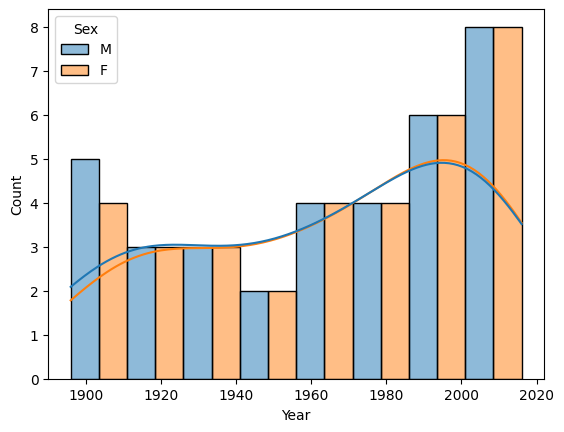

In [18]:
sns.histplot(data= data, x= "Year", kde=True, hue="Sex", multiple="dodge")

In [19]:
# Separera data efter kön och använd booleanmask
male_data = data[data["Sex"] == "M"]
female_data = data[data["Sex"] == "F"]

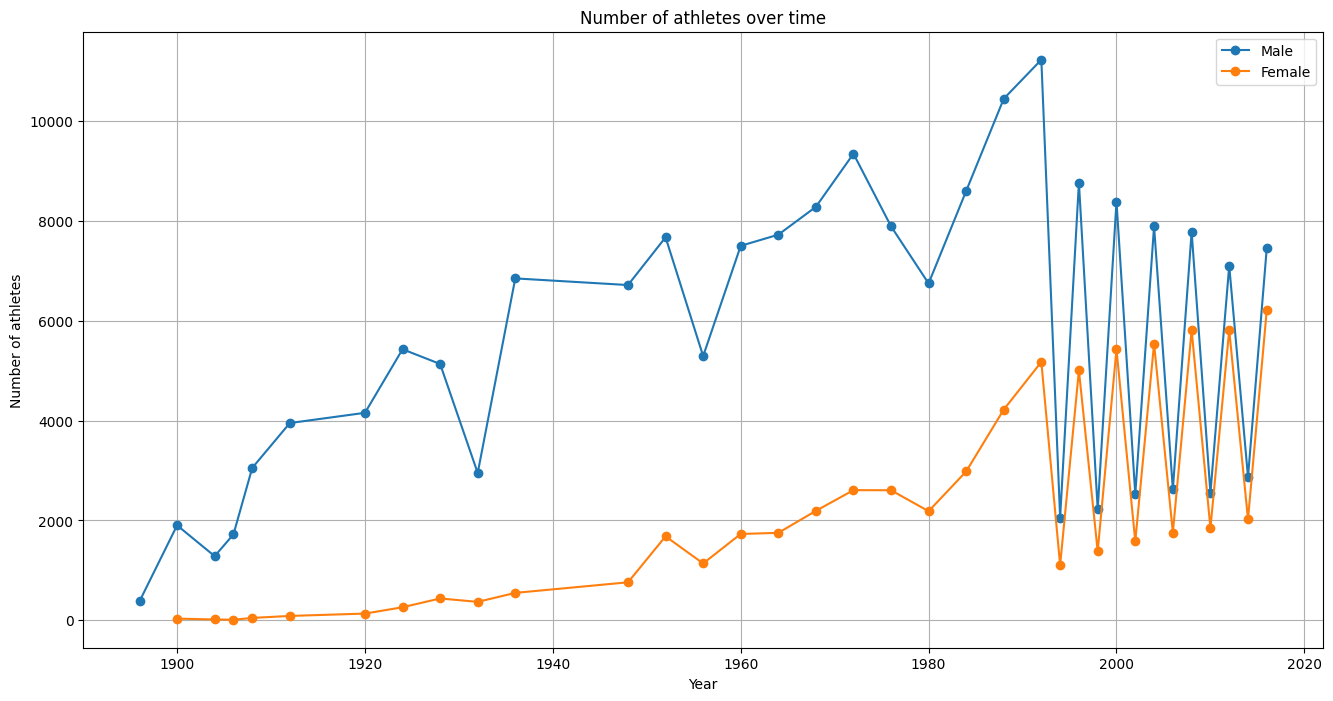

In [20]:
# Skapa linjediagram
plt.figure(figsize=(16,8))


# Lägg till linjer för män och kkvinnor
plt.plot(male_data["Year"], male_data["Athelet"], label="Male", marker= "o")
plt.plot(female_data["Year"], female_data["Athelet"], label= "Female", marker= "o")


# Lägg till etiketter och titel
plt.xlabel("Year")
plt.ylabel("Number of athletes")
plt.title("Number of athletes over time")
plt.legend()
plt.grid(True)

# Using pandas method instead of Duckdb

**c)** Find out the 10 youngest atheletes, their age and the s

In [21]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

**d)** Find out the 10 oldest atheletes, their age and the sport

In [22]:
df[["Name","Age"]].sort_values(by= "Age",ascending=False).head(10)

,Name,Age
257054,John Quincy Adams Ward,97.0
98118,Winslow Homer,96.0
60863,Thomas Cowperthwait Eakins,88.0
60861,Thomas Cowperthwait Eakins,88.0
60862,Thomas Cowperthwait Eakins,88.0
9371,George Denholm Armour,84.0
236912,Louis Tauzin,81.0
154855,Robert Tait McKenzie,81.0
138813,Max Liebermann,80.0
138812,Max Liebermann,80.0


**e)** Find out the 10 youngest atheletes, their age and the sport

In [23]:
df[["Name", "Age"]].sort_values(by= "Age", ascending= True).head(10)

,Name,Age
142882,Dimitrios Loundras,10.0
140650,Liu Luyang,11.0
94058,"Sonja Henie (-Topping, -Gardiner, -Onstad)",11.0
252230,Liana Vicens,11.0
101378,Beatrice Hutiu,11.0
252233,Liana Vicens,11.0
79024,Luigina Giavotti,11.0
43468,Magdalena Cecilia Colledge,11.0
73461,Carlos Bienvenido Front Barrera,11.0
252232,Liana Vicens,11.0


**f)** Find out the five sports with highest median age 

In [24]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [25]:
df.groupby("Sport")["Age"].median().sort_values(ascending=False).head()

Sport
Roque               59.0
Art Competitions    45.0
Alpinism            38.0
Polo                35.0
Croquet             33.0
Name: Age, dtype: float64

**g)**  Find out the five sports with lowest median age

In [26]:
reusltat = df.groupby("Sport")["Age"].median()
print(reusltat.dtype)

float64


In [27]:
df.groupby("Sport")["Age"].median().astype(float).sort_values(ascending= True).head()

Sport
Rhythmic Gymnastics    18.0
Swimming               20.0
Diving                 22.0
Gymnastics             22.0
Figure Skating         22.0
Name: Age, dtype: float64

**h)** Find out top 10 countries after number of gold medals

In [28]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [29]:
dtop_gold_medal = db.query("SELECT NOC, COUNT(Medal) as number_gold_medal FROM df WHERE Medal = 'Gold' GROUP BY NOC ORDER BY number_gold_medal DESC LIMIT 10").df()

In [30]:
gold_medal = df[df["Medal"] == "Gold"]
Top_10_gold_counrty = gold_medal.groupby("NOC")["Medal"].count().sort_values(ascending=False).head()
Top_10_gold_counrty

NOC
USA    2638
URS    1082
GER     745
GBR     678
ITA     575
Name: Medal, dtype: int64

**i)** Find out top 10 countries after number of medals

In [31]:
df.groupby("NOC")["Medal"].count().sort_values(ascending=False).head(10)

NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: Medal, dtype: int64